# Beginner Python Project: Analyze Your Personal Netflix Data

**How much time have I spent watching The Office?**

That's a question that has run through my head repeatedly over the years. The beloved sitcom has been my top "comfort show/background noise" choice for a long time.

It used to be a question I couldn't answer, because the data Netflix allowed users to download about their activity was extremely limited.

Now, though, Netflix allows you to download a veritable treasure-trove of data about your account. With a just a little Python and pandas programming, we can now get a concrete answer to the question: *how much time have I spent watching The Office?*

Want to find out how much time you have spent watching *The Office*, or any other show on Netflix?

In this tutorial, we'll walk you through exactly how to do it step by step!

## Step 1: Download Netflix Data

For the purposes of this tutorial, I'll be using my own Netflix data. To grab your own, make sure you're logged in to Netflix and then visit [visit this page](https://www.netflix.com/account/getmyinfo).

You should see something like this:

![Click the red button to submit your data download request.](images/request.webp)

Click "Submit a Request." Netflix will send you a confirmation email, which you'll need to click.

Then, unfortunately, you'll have to wait. Netflix says preparing your data report can take up to 30 days. I once got one report within 24 hours, but another one took several weeks. Consider bookmarking this page so that you can come back once you've got your data.

The download will arrive as a .zip file that contains roughly a dozen folders, most of which contain data tables in .csv format. There are also two PDFs with additional information about the data.

## Step 2: Familiarize Yourself with the Data

This is a critical step in the data analysis process. The better we understand our data, the better our chances are of producing meaningful analysis.

Let's take a look at what we've got. Here's what we'll see when we unzip the file:

![Content of Netflix Data Zip](images/folders.png)

Our goal here is to figure out how much time I've spent watching Netflix. Content Interaction seems like the most likely folder to contain that data. If we open it, we'll find a file called ViewingActivity.csv that looks exactly like what we want — a log of everything we've viewed over the history of the account.

## Step 3: Load Your Data into a Jupyter Notebook

In [36]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install pandas

# Import Library
import pandas as pd

We will load the csv file and call it `df`.

In [37]:
# Load the dataset
df = pd.read_csv('dataset/ViewingActivity-sample.csv')

Now, let's do a quick preview of the data to make sure everything looks correct. We'll start with `df.shape`, which will tell us the number of rows and columns in the dataframe we've just created.

In [38]:
df.shape

(200, 10)

That result means we have 200 rows and 10 columns. Now let's see what it looks like by previewing the first few rows of data using `df.head()`.

In [39]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Charlie,2013-03-20 5:17:53,0:00:05,NaN,Star Trek: Deep Space Nine: Season 5: Empok No...,NaN,Mac,0:00:05,Not latest view,US (United States)
1,Charlie,2013-03-20 4:27:45,0:44:31,NaN,Star Trek: Deep Space Nine: Season 5: Blaze of...,NaN,Mac,0:44:31,Not latest view,US (United States)
2,Charlie,2013-03-20 4:05:21,0:22:06,NaN,Star Trek: Deep Space Nine: Season 5: Children...,NaN,Mac,0:44:37,0:44:37,US (United States)
3,Charlie,2013-03-20 0:20:03,0:48:14,NaN,The Invisible War,NaN,Microsoft Xbox 360,0:53:18,0:53:18,US (United States)
4,Charlie,2013-03-20 0:10:31,0:04:51,NaN,The Invisible War,NaN,Mac,0:05:01,Not latest view,US (United States)


Perfect!

## Step 4: Preparing the Data for Analysis

Before we do our analysis, let's clean up this data a bit to make it easier to work with.

### Dropping Unnecessary Columns (Optional)

First, we'll start by dropping the columns we're not planning to use. This is totally optional, and it's probably not a good idea for large-scale or ongoing projects. But for a small-scale personal project like this, it can be nice to work with a dataframe that includes only columns we're actually using.

In this case, we're planning to analyze *how much* and *when* I've watched The Office, so we'll need to keep the Start Time, Duration, and Title columns. Everything else can go.

To do this, we'll use `df.drop()` and pass it two arguments:

1. A list of the columns we'd like to drop
2. axis=1, which tells pandas to drop columns

Here's what it looks like:

In [40]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)

df.head()

,Start Time,Duration,Title
0,2013-03-20 5:17:53,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 4:27:45,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 4:05:21,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 0:20:03,0:48:14,The Invisible War
4,2013-03-20 0:10:31,0:04:51,The Invisible War


Great! Next, let's work with the time data.

### Converting Strings to Datetime and Timedelta in Pandas

The data in our two time-related columns certainly looks correct, but what format is this data actually being stored in? We can use `df.dtypes` to get a quick list of the data types for each column in our dataframe:

In [41]:
# Check columns types
df.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

As we can see here, all three columns are stored as `object`, which means they're strings. That's fine for the `Title` column, but we need to change the two time-related columns into the correct datatypes before we can work with them.

Specifically, we need to do the following:

1. Convert Start Time to datetime (a data and time format pandas can understand and perform calculations with)
2. Convert Start Time from UTC to our local timezone
3. Convert Duration to timedelta (a time duration format pandas can understand and perform calculations with)

So, let's approach those tasks in that order, starting with converting `Start Time` to datetime using pandas's `pd.to_datetime()`.

We'll also add the optional argument `utc=True` so that our datetime data has the UTC timezone attached to it. This is important, since we'll need to convert it to a different timezone in the next step.

We'll then run `df.dtypes` again just to confirm that this has worked as expected.

In [42]:
# Convert data types
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

Now we've got that column in the correct format, it's time to change the timezone so that when we do our analysis, we'll see everything in local time.

We can convert datetimes to any timezone using the `.tz_convert()` and passing it an argument with the string for the timezone we want to convert to. In this case, that's `'US/Eastern'`. To find your specific timezone, [here's a handy reference of TZ timezone options](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones).

The tricky bit here is that we can only use `.tz_convert()` on a DatetimeIndex, so we need to set our `Start Time` column as the index using `set_index()` before we perform the conversion.

In this tutorial, we'll then use `reset_index()` to turn it back into a regular column afterwards. Depending on your preference and goals, this may not be necessary, but for the purposes of simplicity here, we'll try to do our analysis with all of our data in columns rather than having some of it as the index.

Putting all of that together looks like this:

In [43]:
# change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

# convert from UTC timezone to Asia/Jakarta time
df.index = df.index.tz_convert('Asia/Jakarta')

# reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
df.head()

,Start Time,Duration,Title
0,2013-03-20 12:17:53+07:00,0:00:05,Star Trek: Deep Space Nine: Season 5: Empok No...
1,2013-03-20 11:27:45+07:00,0:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20 11:05:21+07:00,0:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-20 07:20:03+07:00,0:48:14,The Invisible War
4,2013-03-20 07:10:31+07:00,0:04:51,The Invisible War


Now, let's deal with our `Duration` column. This is, as the name suggests, a duration — a measure of a length of time. So, rather than converting it to a datetime, we need to convert it to a timedelta, which is a measure of time duration that pandas understands.

This is very similar to what we did when converting the `Start Time` column. We'll just need to use `pd.to_timedelta()` and pass it the column we want to convert as an argument.

Once again, we'll use `df.dtypes` to quickly check our work.

In [44]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time    datetime64[ns, Asia/Jakarta]
Duration                   timedelta64[ns]
Title                               object
dtype: object

Perfect! But we've got one more data preparation task to handle: filtering that Title column so that we can analyze only views of `The Office`.

### Filtering Strings by Substring in pandas Using str.contains

There are many ways we could approach filtering *The Office* views. For our purposes here, though, we're going to create a new dataframe called `office` and populate it only with rows where the `Title` column contains `'The Office (U.S.)'`.

We can do this using `str.contains()`, giving it two arguments:

- `'The Office (U.S.)'`, which is the substring we're using to pick out only episodes of *The Office*.
- `regex=False`, which tells the function that the previous argument is a string and not a regular expression.

Here's what it looks like in practice:

In [45]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'The Office (U.S.)'
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

Once we've done this, there are a few ways we could double-check our work. For example, we could use `office.sample(20)` to inspect a random ten rows of our new `office` dataframe. If all twenty rows contained Office episodes, we could be pretty confident things worked as expected.

For the purposes of preserving a little privacy in this tutorial, though, I'll run `office.shape` to check the size of the new dataframe. Since this dataframe should contain *only* my views of *The Office*, we should expect it to have significantly fewer rows than the 27,000+ row `df` dataset.

In [46]:
office.shape

(137, 3)

### Filtering Out Short Durations Using Timedelta

Before we really dig in and analyze, we should probably take one final step. We noticed in our data exploration that when something like an episode preview auto-plays on the homepage, it counts as a view in our data.

However, watching two seconds of a trailer as you scroll past isn't the same as actually watching an episode! So let's filter our `office` dataframe down a little bit further by limiting it to only rows where the `Duration` value is greater than one minute. This should effectively count the watchtime for partially watched episodes, while filtering out those short, unavoidable "preview" views.

Again, `office.head()` or `office.sample()` would be good ways to check our work here, but to maintain some semblance of privacy, I'll again use `df.shape` just to confirm that some rows were removed from the dataframe.

In [47]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(130, 3)

That looks good, so let's move on to the fun stuff!

## Step 5: Analyzing the Data

### How much time have I spent watching *The Office*?

First, let's answer the big question: How much time have I spent watching The Office?

Since we've already got our `Duration` column in a format that pandas can compute, answering this question is quite straightforward. We can use `.sum()` to add up the total duration:

In [48]:
office['Duration'].sum()

Timedelta('1 days 14:57:28')

So, I've spent a total of 58 days, 14 hours, 3 minutes and 33 seconds watching The Office on Netflix. That is . . . a lot.

In my defense, that's over the course of a decade, and a good percentage of that time wasn't spent actively watching! When I'm doing brain-off work, working out, playing old video games, etc., I'll often turn *The Office* on as a kind of background noise that I can zone in and out of. I also used to use it as a kind of white noise while falling asleep.

But we're not here to make excuses for my terrible lifestyle choices! Now that we've answered the big question, let's dig a little deeper into my The Office-viewing habits:

### When do I watch *The Office*?

Let's answer this question in two different ways:

- On which days of the week have I watched the most Office episodes?
- During which hours of the day do I most often start Office episodes?

We'll start with a little prep work that'll make these tasks a little more straightforward: creating new columns for "weekday" and "hour".

We can use the `.dt.weekday` and `.dt.hour` methods on the `Start Time` column to do this and assign the results to new columns named `weekday` and `hour`:

In [49]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour

# check to make sure the columns were added correctly
office.head()

,Start Time,Duration,Title,weekday,hour
10,2013-03-19 06:04:22+07:00,0 days 00:21:07,The Office (U.S.): Season 5: Moroccan Christma...,1,6
11,2013-03-19 05:42:50+07:00,0 days 00:21:30,The Office (U.S.): Season 5: The Surplus (Epis...,1,5
12,2013-03-19 05:21:52+07:00,0 days 00:20:55,The Office (U.S.): Season 5: Frame Toby (Episo...,1,5
14,2013-03-19 03:29:22+07:00,0 days 00:20:15,The Office (U.S.): Season 5: Business Trip (Ep...,1,3
15,2013-03-19 03:07:57+07:00,0 days 00:21:21,The Office (U.S.): Season 5: Customer Survey (...,1,3


Now, let's do a little analysis! These results will be easier to understand visually, so we'll start by using the `%matplotlib inline` magic to make our charts show up in our Jupyter notebook. Then, we'll import matplotlib.

In [50]:
# import sys
# !{sys.executable} -m pip install matplotlib

%matplotlib inline
import matplotlib

Now, let's plot a chart of my viewing habits by day of the week. To do this, we'll need to work through a few steps:

- Tell pandas the order we want to chart the days in using pd.Categorical — by default, it will plot them in descending order based on the number of episodes watched on each day, but when looking at a graph, it'll be more intuitive to see the data in Monday-Sunday order.
- Count the number of episodes I viewed on each day in total
- Sort and plot the data

(There are also many other ways we could approach analyzing and visualizing this data, of course.)

Let's see how it looks step by step:

<AxesSubplot:title={'center':'Office Episodes Watched by Day'}>

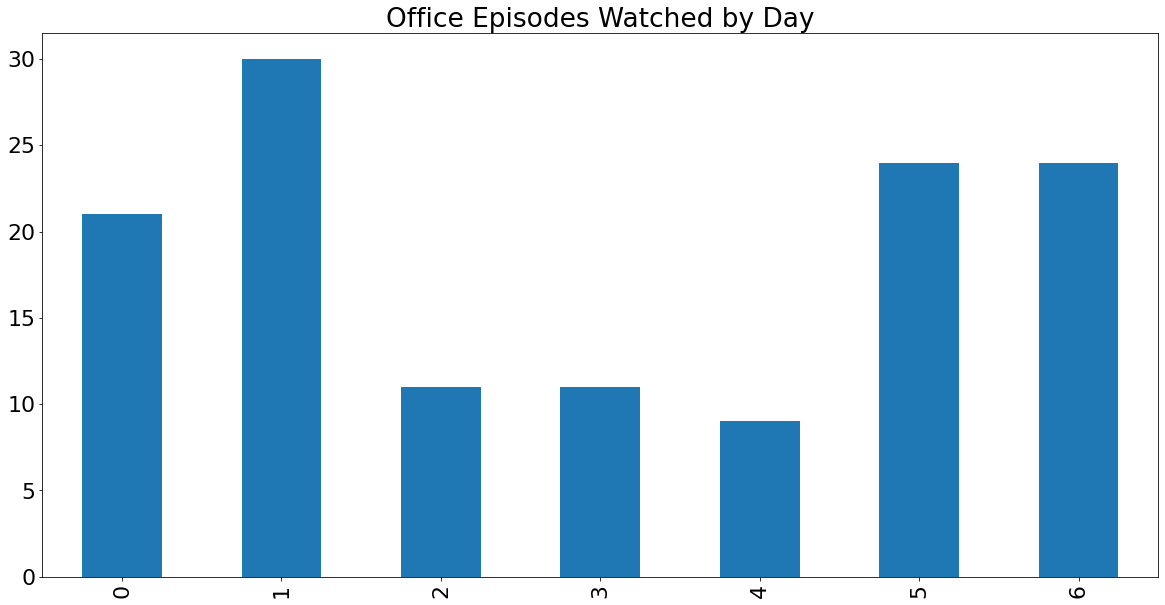

In [51]:
# set our categorical and define the order so the days are plotted Monday-Sunday
office['weekday'] = pd.Categorical(office['weekday'], categories=
    [0,1,2,3,4,5,6],
    ordered=True)

# create office_by_day and count the rows for each weekday, assigning the result to that variable
office_by_day = office['weekday'].value_counts()

# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
office_by_day = office_by_day.sort_index()

# optional: update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size': 22})

# plot office_by_day as a bar chart with the listed size and title
office_by_day.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Day')

As we can see, I've actually tended to watch The Office more during the week than on weekends. This makes sense based on my habits, since it's often background noise during evening work, workouts, etc.

Now, let's take a look at the same data by hour. The process here is very similar to what we just did above:

<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

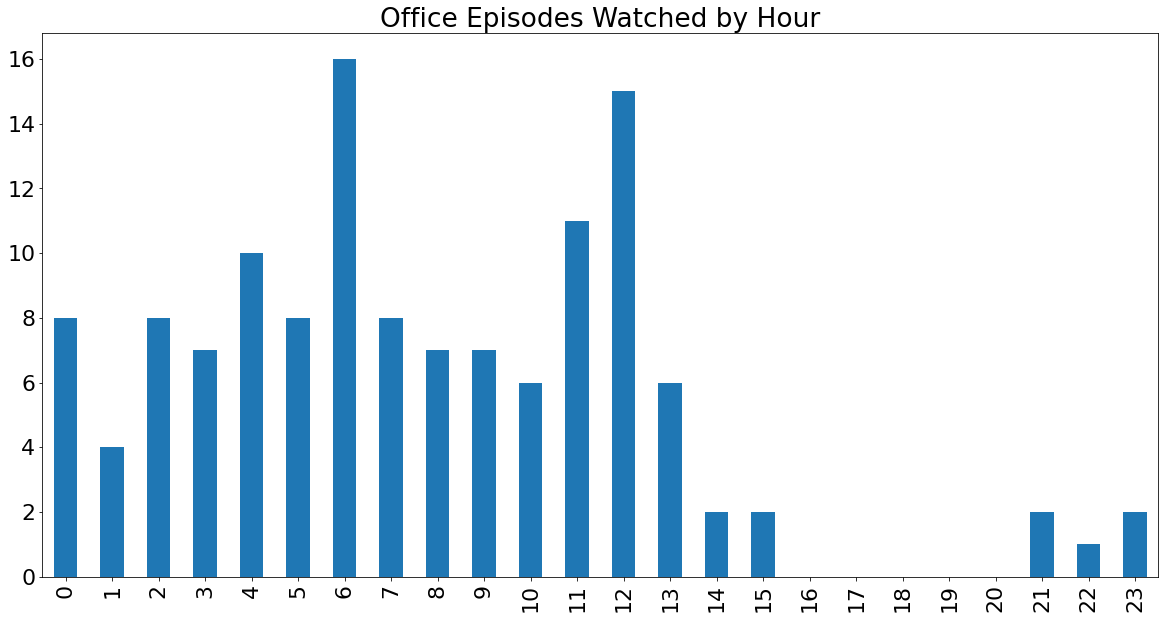

In [52]:
# set our categorical and define the order so the hours are plotted 0-23
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

# create office_by_hour and count the rows for each hour, assigning the result to that variable
office_by_hour = office['hour'].value_counts()

# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
office_by_hour = office_by_hour.sort_index()

# plot office_by_hour as a bar chart with the listed size and title
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')

From the data, it looks like 12 a.m. and 1 a.m. were the hours during which I most often started episodes of *The Office*. This is due to my (unhealthy) habit of using the show as white noise while going to sleep — many of these episodes probably auto-played while I was already asleep!

Outside of that, it's no surprise to see that most of my viewing happened during the evenings.

(Note: This data actually may not reflect my real habits very well, because I lived in China for a significant portion of my Netflix account ownership. We didn't account for that in this tutorial because it's a unique situation that won't apply for most people. If you've spent significant time in different timezones during your Netflix usage, then you may need to do some additional date filtering and timezone conversion in the data cleaning stage before analysis.)

# What's Next?

In this tutorial, we've taken a quick dive into some personal Netflix data and learned that — among other things — I watch The Office too much. But there are tons of places you could go from here! Here are some ideas for expanding this project for yourself:

- Do the same or similar analysis for another show.
- See if you can create separate columns for show titles and episode titles using regular expressions.
- Figure out which specific episodes you've watched most and least.
- Create prettier charts.

You can also try out some other fun projects using your own personal data. For example:

- Use Python to find out how much you've spent on Amazon.
- Use Python to analyze your Facebook posting habits.